In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Creating data set
 
# A
d =[0, 1, 1, 1, 0, 0,    
	0, 1, 0, 0, 1, 0,    
	0, 1, 0, 0, 1, 0,    
	0, 1, 0, 0, 1, 0,    
	0, 1, 1, 1, 0, 0]

# B
j =[1, 1, 1, 1, 1, 1,
	0, 0, 0, 1, 0, 0,
	0, 0, 0, 1, 0, 0,
	0, 0, 0, 1, 0, 0,
	0, 1, 1, 1, 0, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]
 
# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

In [32]:
# converting data and labels into numpy array

"""
Convert the matrix of 0 and 1 into one hot vector 
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""

x =[np.array(d).reshape(1, 30), np.array(j).reshape(1, 30),
	np.array(c).reshape(1, 30)]


# Labels are also converted into NumPy array
y = np.array(y)


print(x, "\n\n", y)

[array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 0]]), array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [33]:
# activation function

def sigmoid(x):
	return(1/(1 + np.exp(-x)))

def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# out put of layer 2 
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(input_size, hidden_size, output_size):
    w1 = np.random.randn(input_size, hidden_size)
    w2 = np.random.randn(hidden_size, output_size)
    return w1, w2
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
    s = (np.square(out - Y))
    s = np.sum(s) / len(Y)  # Make sure it's uppercase 'Y'
    return s

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Backpropagation adapted for the new network structure with descriptive variable names
def back_prop(x, y, w1, w2, alpha):
    # Forward pass
    input_to_hidden = x.dot(w1)
    hidden_activation = sigmoid(input_to_hidden)
    hidden_to_output = hidden_activation.dot(w2)
    output_activation = sigmoid(hidden_to_output)
    
    # Compute the error at the output
    derivative_output_error = output_activation - y
    
    # Compute the derivative of the sigmoid function at the output layer
    derivative_output_activation = sigmoid_prime(hidden_to_output)
    
    # Compute the gradient for the output layer weights
    gradient_w2_weights = hidden_activation.T.dot(derivative_output_activation * derivative_output_error)
    
    # Compute the error at the hidden layer by backpropagating the output error through the weights
    hidden_error = (derivative_output_error * derivative_output_activation).dot(w2.T)
    
    # Compute the derivative of the sigmoid function at the hidden layer
    derivative_hidden_activation = sigmoid_prime(input_to_hidden)
    
    # Compute the gradient for the hidden layer weights
    gradient_w1_weights = x.T.dot(derivative_hidden_activation * hidden_error)
    
    # Update weights with the computed gradients
    w1 -= alpha * gradient_w1_weights
    w2 -= alpha * gradient_w2_weights
    
    return w1, w2


def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], Y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	if x.ndim == 1:
		x = x.reshape(1, -1)
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter D.")
	elif(k == 1):
		print("Image is of letter J.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show() 

In [34]:
w1, w2 = generate_wt(30, 5, 3)
print(w1, "\n\n", w2)
print(len(w1))

[[ 1.09310202 -0.337599   -0.86256604  1.67731774 -1.01799032]
 [ 1.45511772 -0.48535919  0.66440195  1.11775783  0.61862335]
 [ 1.42464968 -0.59547624 -0.67972401 -0.48560746  0.23063554]
 [-0.62553582  2.90521644 -0.06673751  0.04613201  1.739403  ]
 [ 0.20003581  0.26798183  0.585808    0.4799792   0.9361789 ]
 [ 0.12336998 -0.77842191  0.15875971 -0.30113058 -0.33145794]
 [ 1.57350828 -0.73236687 -2.1853969  -0.28348171 -1.17965437]
 [-0.08781642 -0.62591326 -0.77225168  0.19180603 -0.46721996]
 [ 0.39051187 -0.38427636  0.72046294 -0.99157     1.12684487]
 [ 0.16752691  0.33517775 -0.86234475 -0.42420461 -0.17714203]
 [-0.36616527 -0.07153385  0.61645406 -1.04309116  1.39176698]
 [ 0.04613971  0.39299169 -0.08708068 -1.8663722   0.10016421]
 [ 0.68138188 -2.24791303  1.76197647 -0.99593004 -0.10450992]
 [-0.77213217  0.33212626  0.72284345 -0.46922404  0.60648542]
 [-0.74929626  0.31174283 -0.19728359 -1.00273719  0.23028163]
 [-0.47842439 -0.13376572  0.6442297  -1.0302085   0.56

In [35]:
"""The arguments of train function are data set list x, 
correct labels y, weights w1, w2, learning rate = 0.1, 
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of 
trained weights w1, w2"""

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 71.835470750949
epochs: 2 ======== acc: 72.34797706265272
epochs: 3 ======== acc: 72.87323582155574
epochs: 4 ======== acc: 73.409956124677
epochs: 5 ======== acc: 73.95552312611417
epochs: 6 ======== acc: 74.50597298845962
epochs: 7 ======== acc: 75.05610525075218
epochs: 8 ======== acc: 75.59975976131234
epochs: 9 ======== acc: 76.13025338464938
epochs: 10 ======== acc: 76.64092963000083
epochs: 11 ======== acc: 77.12573642291898
epochs: 12 ======== acc: 77.57973033844735
epochs: 13 ======== acc: 77.99941975132094
epochs: 14 ======== acc: 78.38290055265243
epochs: 15 ======== acc: 78.72978971973205
epochs: 16 ======== acc: 79.04100432881145
epochs: 17 ======== acc: 79.31845411182357
epochs: 18 ======== acc: 79.56471356926093
epochs: 19 ======== acc: 79.78272274800342
epochs: 20 ======== acc: 79.97554415045971
epochs: 21 ======== acc: 80.14618437016955
epochs: 22 ======== acc: 80.29747631600449
epochs: 23 ======== acc: 80.43201137132019
epochs: 24 ======== acc:

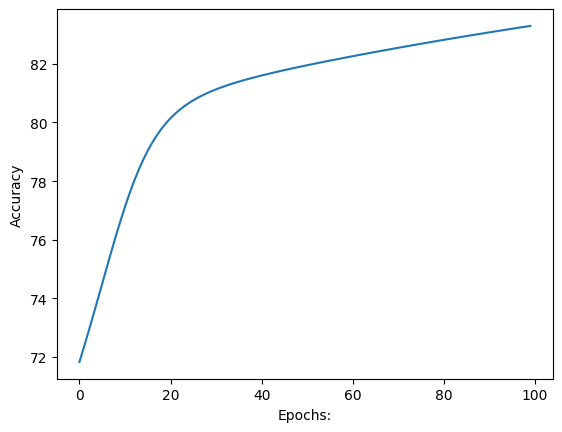

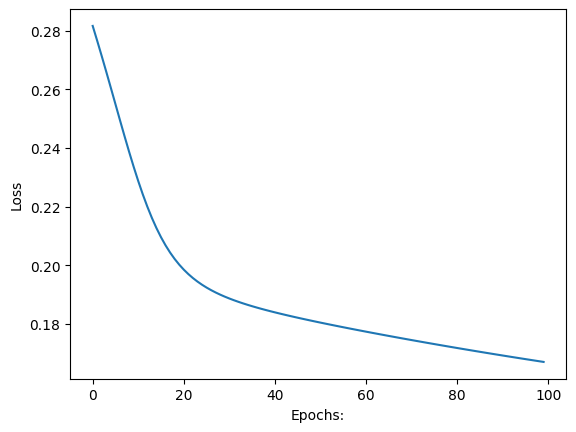

In [36]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

Image is of letter D.


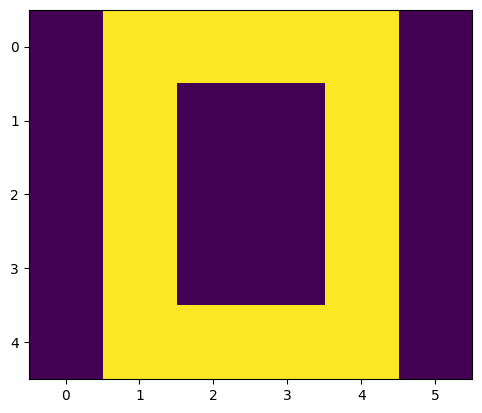

In [37]:
weird_d=[0, 1, 1, 1, 1, 0,    
	0, 1, 0, 0, 1, 0,    
	0, 1, 0, 0, 1, 0,    
	0, 1, 0, 0, 1, 0,    
	0, 1, 1, 1, 1, 0]
weird_d = np.array(weird_d).reshape(1, 30)
predict(weird_d,w1,w2)